In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
"""Pharmahacks - Phyla Challenge #2"""

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('challenge_1_gut_microbiome_data.csv', index_col=0)
print(df.head(5))

          Bacteria-1  Bacteria-2  Bacteria-3  Bacteria-4  Bacteria-5  \
Sample-1         0.0         0.0         0.0         0.0         0.0   
Sample-2         0.0         0.0         0.0         0.0         0.0   
Sample-3         0.0        10.0         0.0         0.0         0.0   
Sample-4         0.0        17.0         0.0         0.0         0.0   
Sample-5         0.0         8.0         0.0         0.0         0.0   

          Bacteria-6  Bacteria-7  Bacteria-8  Bacteria-9  Bacteria-10  ...  \
Sample-1         0.0         0.0         0.0         0.0          0.0  ...   
Sample-2         0.0         0.0         0.0         0.0          0.0  ...   
Sample-3         0.0         0.0         0.0         0.0          0.0  ...   
Sample-4         0.0         0.0         0.0         0.0          0.0  ...   
Sample-5         0.0         0.0         0.0         0.0          0.0  ...   

          Bacteria-1086  Bacteria-1087  Bacteria-1088  Bacteria-1089  \
Sample-1            0.0   

In [3]:
X = df.filter(regex=("Bacteria-*"))
Y = df['disease']

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.25, random_state=0)

In [5]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

In [6]:
confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=[
                               'Actual'], colnames=['Predicted'])

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

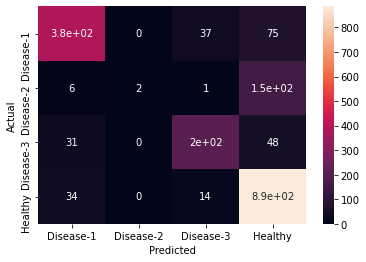

In [7]:
sn.heatmap(confusion_matrix, annot=True)

In [9]:
print('F1 Score - Micro: ', metrics.accuracy_score(Y_test, Y_pred))
print('F1 Score - Macro: ', metrics.f1_score(Y_test, Y_pred, average='macro'))
print('F1 Score - Weighted: ', metrics.f1_score(Y_test, Y_pred, average='weighted'))

F1 Score - Micro:  0.7888829502939605
F1 Score - Macro:  0.6092643971812871
F1 Score - Weighted:  0.7535328039740695


In [11]:
# Actual disease
print(Y_test)
# Prediction
print(Y_pred)
Y_proba = clf.predict_proba(X_test)
# Probability
print(Y_proba)

Sample-5024      Healthy
Sample-2976    Disease-3
Sample-40      Disease-2
Sample-3862      Healthy
Sample-4761      Healthy
                 ...    
Sample-4758      Healthy
Sample-416     Disease-2
Sample-4175      Healthy
Sample-5207      Healthy
Sample-1594    Disease-1
Name: disease, Length: 1871, dtype: object
['Healthy' 'Disease-3' 'Healthy' ... 'Healthy' 'Healthy' 'Disease-1']
[[0.07 0.08 0.11 0.74]
 [0.23 0.03 0.62 0.12]
 [0.02 0.15 0.08 0.75]
 ...
 [0.1  0.21 0.06 0.63]
 [0.09 0.23 0.12 0.56]
 [0.98 0.   0.01 0.01]]
